# CS486 - Artificial Intelligence
## Lesson 31 - Decision Trees

*Machine learning* generally refers to AI techniques that *learn* from data instead of being explicitly programmed. `sklearn` is a well-established machine learning library that is included with Anaconda and includes implementations for the algorithms we'll be discussing in the next few lessons. 

There are some libraries that we'll use that aren't included in the Anaconda distribution. We can use `ipydeps` to install those dependencies from within a notebook. I recommend opening a terminal and installing `ipydeps`:

```bash
$ pip install ipydeps
```

If you would like to visualize decision trees, then you'll need an additional system dependency, `graphviz`:

```bash
$ conda install graphviz
```

### Bias vs Variance

*Bias* is an error from poor assumptions in the machine learning algorithm. High bias misses the relevant relations between features and target outputs. A model with high bias tends to  **underfit** the data.

*Variance* is the error from sensitivity to small fluctuations in the training set. High variance captures the random noise in the training data, rather than the intended outputs. A model with high variance tends to **overfit** the data. 

<center><a href="http://scott.fortmann-roe.com/docs/BiasVariance.html"><img src="images/bias_variance.png" width=300></a></center>

As a general rule, simple models have high bias and complex models tend to have high variance. Good models are a balance between the two. 

<center><a href="http://scott.fortmann-roe.com/docs/BiasVariance.html"><img src="images/bias_variance_tradeoff.png" width=300></a></center>

### Decision Trees

One of the simplest machine learning classifiers is a decision tree. Consider the following decision tree which classifies fruit:

<center><img src="aima/images/decisiontree_fruit.jpg"></center>

How can we build such a tree from data alone? Decision trees are built top-down, by choosing a variable at each step that best splits the set of items. 

### Entropy

Bad splits are random so we want to minimize randomness or *entropy*. Formally, entropy is the number of bits needed to transmit a message:

$$H(p) = -\sum{p_i \log_2{p_i}}$$

**Information Gain** is difference between entropy of the parent and weighted sum of entropy of children. The feature used for splitting is the one which provides the most information gain.

The decision tree implementation that follows uses the **Gini impurity** to decide splits. The Gini impurity of a set is the probability of a randomly chosen element to be incorrectly labeled if it was randomly labeled according to the distribution of labels in the set:

$$I_G(p) = \sum{p_i(1 - p_i)} = 1 - \sum{p_i^2}$$

We will select splits that minimize the Gini impurity in child nodes.

### The Titanic

Let's build a decision tree that takes the attributes of a passenger on the Titanic and decides if that passenger was likely to survive or not. First we need to import our data. Take a moment to explore the data.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("data/titanic.csv")
data

Next we need to clean up our data a little. All of our inputs must be numbers, so we'll have to convert the $Sex$ column to digits. A lot of classifiers use titles (e.g. Mr, Mrs, Sir, etc) as features, but we'll just drop the name column for now.

Finally, we'll split our data in to training and testing (cross-validation) data. Why do we need to split our data? 

In [ ]:
data["Sex"] = data["Sex"].map({"male":0,"female":1})

X = data.drop(columns=["Survived", "Name"])
y = data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

The following block actually trains and builds the decision tree. Execute the code and consider the following questions:

* How do you expect the model to perform on the data it trained on? Do you think it will classify 100% of the samples in the training data correctly? Why or why not?
* How do you think it will perform on the test data? 
* Do you think the model overfits or underfits the data?

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
print(round(acc_decision_tree,2,), "%")

Here the actual decision tree that was produced. What do you notice about the leaves? Did everything get classified? 

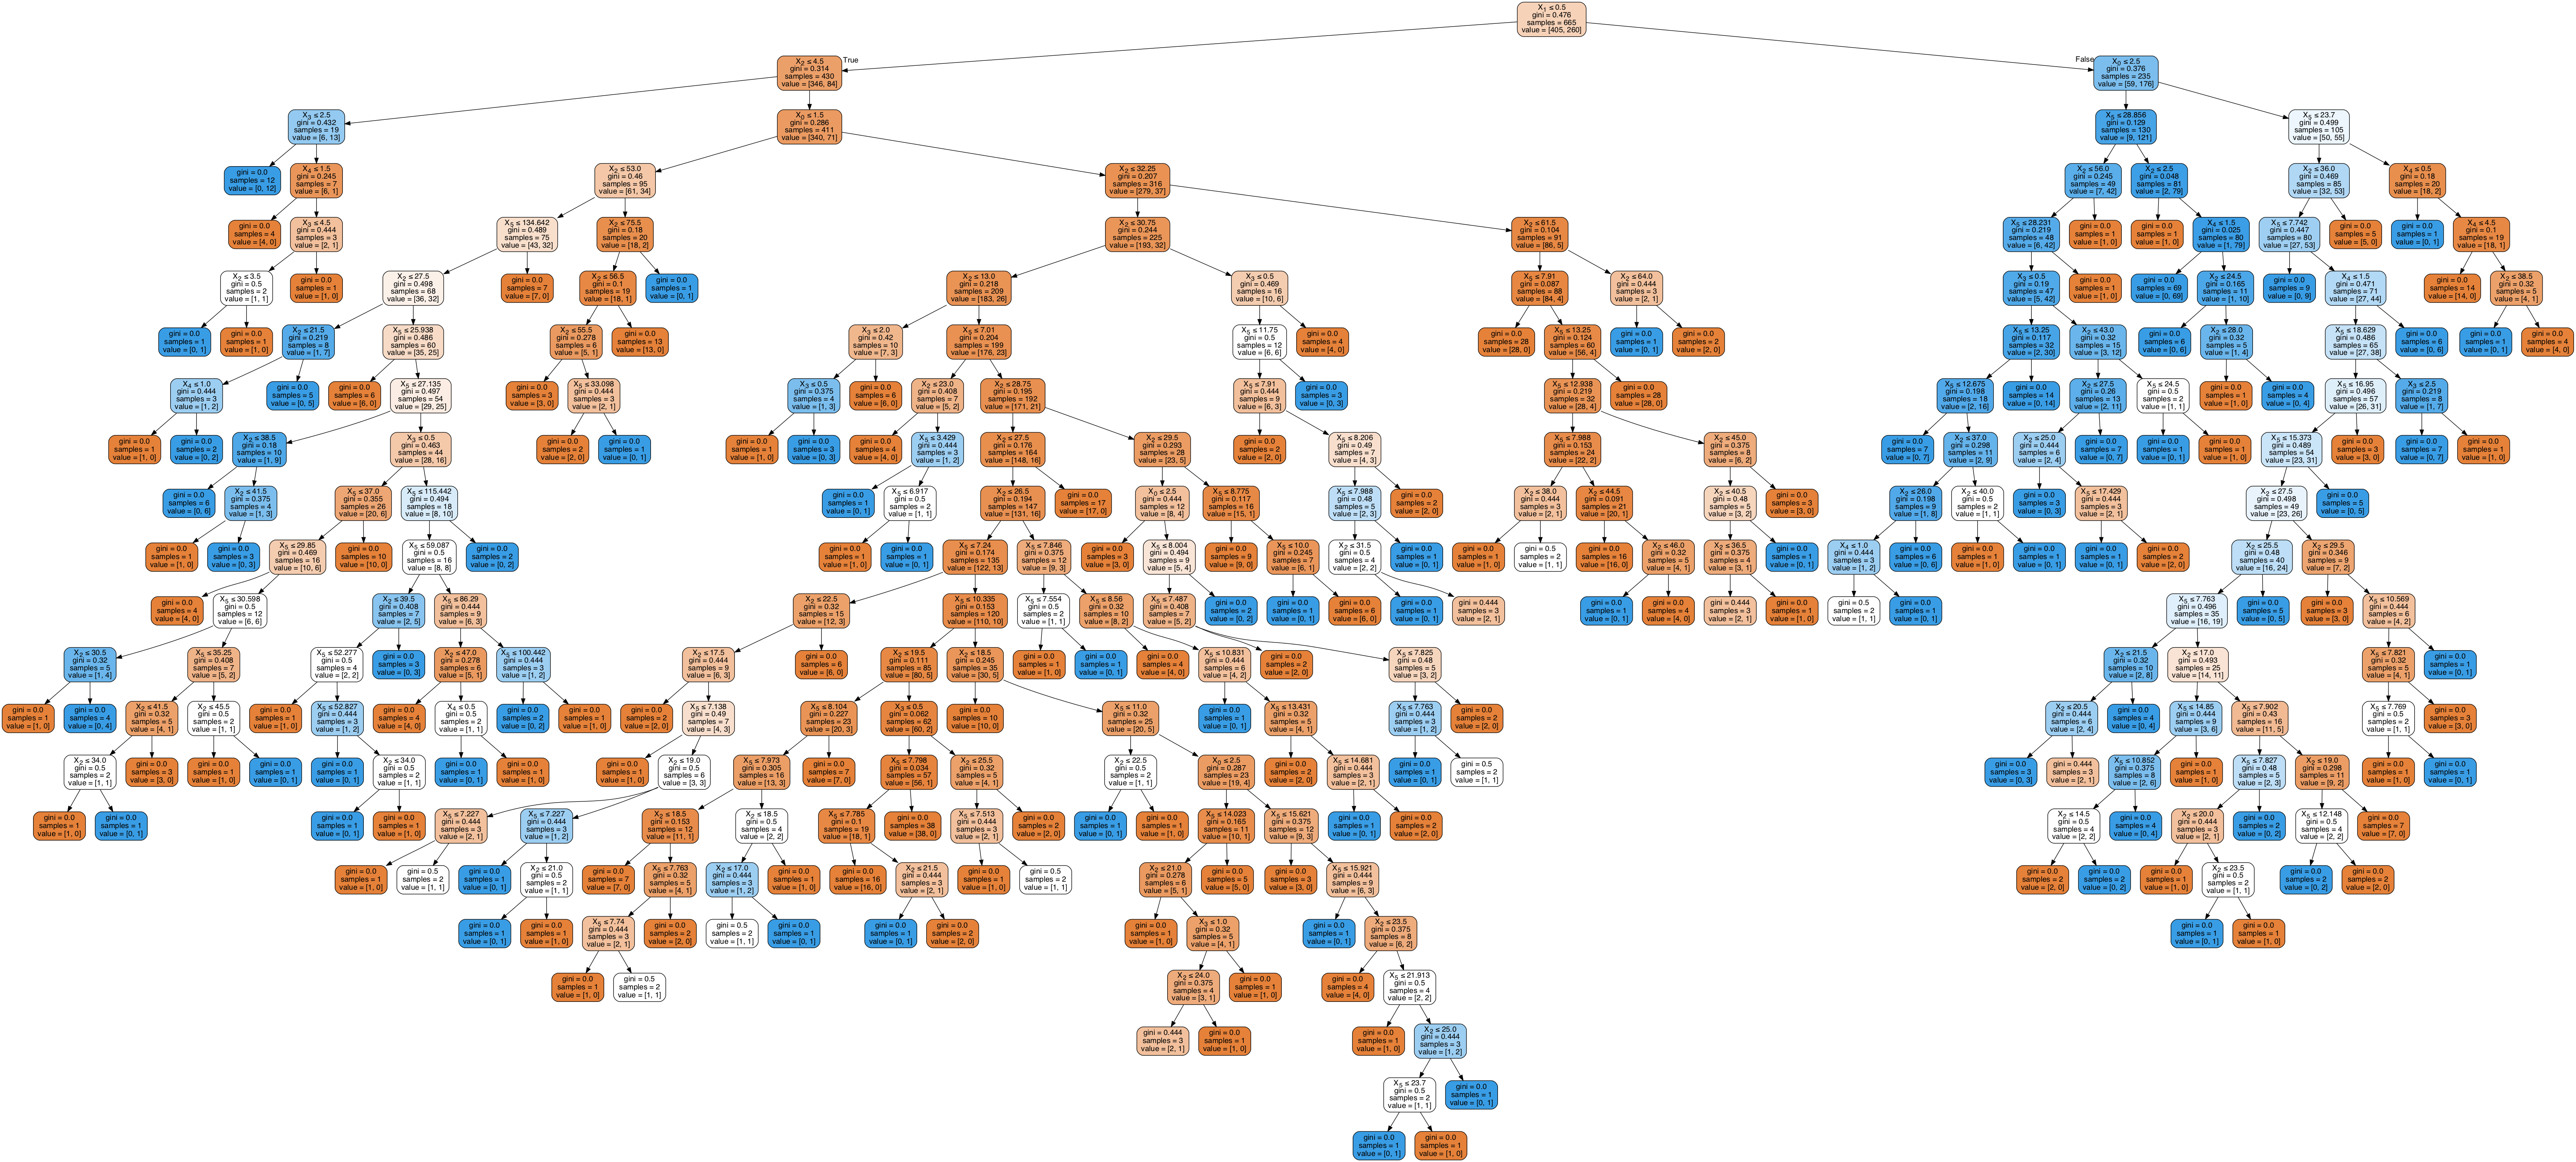

In [6]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Random Forests

This algorithm creates an ensemble of decision trees using bagging and feature bagging. It takes 'm' examples randomly from the total number of examples and then perform feature bagging with probability p to retain an attribute. All the predictors are predicted from the DecisionTreeLearner and then a final prediction is made.

Build a model on the same data using a Random Forest classifier.  The code should be nearly identical. Answer the following questions when you're done:

* Did the random forest perform better or worse?
* What is the random forest doing differently?
* What is bagging?

In [ ]:
from sklearn.ensemble import RandomForestClassifier